# Required Labraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers, Sequential 
from tensorflow.keras.datasets import cifar10

2025-09-13 18:51:19.442339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757789479.798888      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757789479.902266      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#  Dataset Load

In [2]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


#  Normalize (0-255 → 0-1)

In [3]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255 

# Shape of Training , Testing Data

In [4]:
print('Training Data Shape :', X_train.shape)
print('Testing Data Shape : ', X_test.shape)

Training Data Shape : (50000, 32, 32, 3)
Testing Data Shape :  (10000, 32, 32, 3)


# **CNN** Model Architecture 

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


model = Sequential([
    
    Conv2D(32,(3,3), activation='relu',padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),


    Flatten(),

    Dense(512, activation='relu' ), 
    Dropout(0.3),




    Dense(10, activation='softmax')
    
])  

# Compile Model 

In [12]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.0003),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
)


In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=3,
                                 factor=0.5,
                                 min_lr=1e-6)

es = EarlyStopping(monitor='val_accuracy',
                   patience=10,
                   restore_best_weights=True)

# Train Model

In [15]:
history= model.fit(datagen.flow(X_train, y_train,batch_size=32), epochs=50,  validation_data=(X_test, y_test), 
                   callbacks=[lr_reduction, es])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.3207 - loss: 1.9739 - val_accuracy: 0.4503 - val_loss: 1.6596 - learning_rate: 3.0000e-04
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4991 - loss: 1.4057 - val_accuracy: 0.5870 - val_loss: 1.1696 - learning_rate: 3.0000e-04
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5790 - loss: 1.1962 - val_accuracy: 0.6715 - val_loss: 0.9416 - learning_rate: 3.0000e-04
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6267 - loss: 1.0548 - val_accuracy: 0.7073 - val_loss: 0.8344 - learning_rate: 3.0000e-04
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6546 - loss: 0.9824 - val_accuracy: 0.7317 - val_loss: 0.7869 - learning_rate: 3.0000e-04
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6817 - loss: 0.9034 - val_accuracy: 0.7012 - val_loss: 0.8919 - learning_rate: 3.0000e-04
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━

#  Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


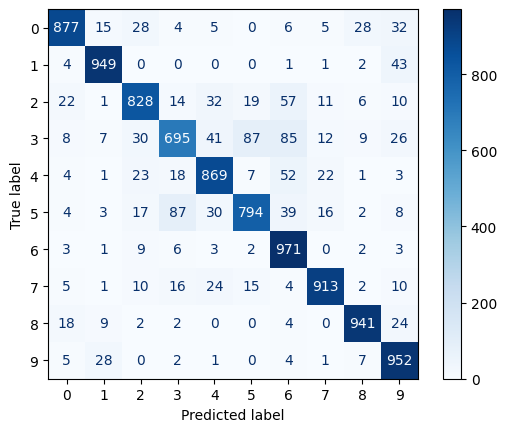

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred=model.predict(X_test)
y_pred_cls= np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_cls)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Accuracy Plot
**Training accuracy vs Validation accuracy**


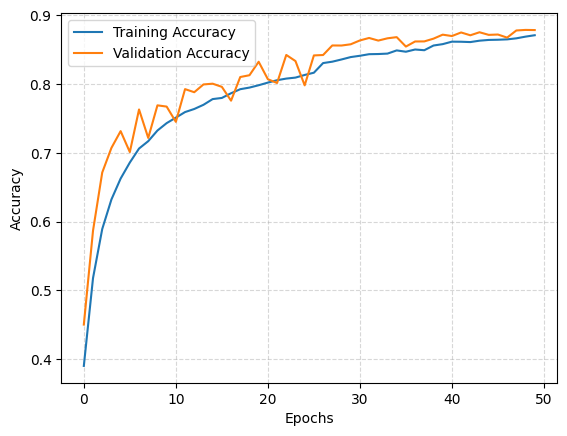

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

# Loss Plot
**Training loss vs Validation loss**

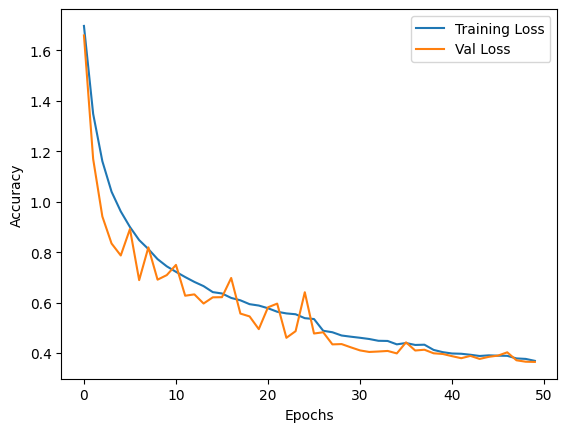

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()